# Visualisation of the trials

## Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import json

from new_analysis import eq_algo_summary, get_job_status
from constants import TEMP_DIR, ALGORITHMS

## Read the data

In [21]:
###### Read the data ######
read_from_file = False # set to False to generate a new summary


if read_from_file:
    with open(TEMP_DIR / "eq_algo_summary.json", "r") as f:
        summary_dict = json.load(f)
else:
    get_job_status(state="finished", new_status=True)
    summary_dict = eq_algo_summary()

# create a dataframe from the summary dictionary
eq_names = [s.split(" ")[1] for s in summary_dict.keys()]
summary_df = pd.DataFrame(columns=ALGORITHMS, index=eq_names)
summary_df.index.name = "Equation"

for eq in summary_dict:
    for algo in summary_dict[eq]:
        summary_df.loc[eq.split(" ")[1], algo] = np.array(summary_dict[eq][algo]["last_n"])


Function get_status_of_jobs took 45.55878924578428 seconds to execute.


 49%|████▉     | 12114/24711 [00:19<00:20, 615.23iteration/s]


Found 12114 finished jobs
Found 0 failed jobs
[]


## Visualise the data

Could not plot III.19.51
Plots saved in "plots.pdf"


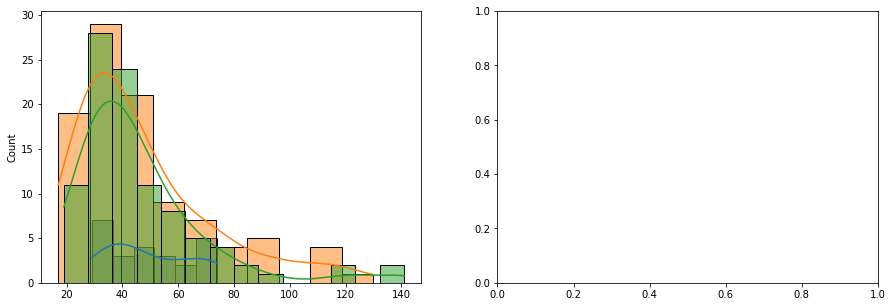

In [23]:
# Plot histogram with KDE for each equation and algorithm on the left, and a boxplot on the right
with PdfPages(TEMP_DIR / 'plots.pdf') as pdf:
    for equation in summary_df.index:

        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        try:
            for column in summary_df.columns:
                sns.histplot(summary_df.loc[equation, column], kde=True, ax=ax[0], label=column)
            # plot the boxplot with the algorithm names on the x-axis
            sns.boxplot(data=summary_df.loc[equation], ax=ax[1])
        except:
            print(f"Could not plot {equation}")
            continue
        # add x-ticks to the boxplot
        ax[1].set_xticklabels(ALGORITHMS, rotation=45, horizontalalignment='right')

        ax[0].set_title(f"{equation} - Histogram with KDE")
        ax[1].set_title(f"{equation} - Boxplot")
        ax[0].set_xlabel("Number of steps")
        ax[1].set_xlabel("Algorithm")
        # only show the legend for the first, third, fifth, etc. handle
        handles, labels = ax[0].get_legend_handles_labels()
        ax[0].legend(handles[::2], labels[::2])
        #ax.legend()
        pdf.savefig(fig)
        plt.close(fig)
print('Plots saved in "plots.pdf"')